# Credit Card Fraud Detection Using Random Forest Classification

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

## Load the dataset

In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [18]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier = len(fraud)/float(len(valid))
print(outlier)
print("Fraud cases = {}".format(len(fraud)))
#print("Valid Transactions = {}".format(len(valid)))
print("Valid Transactions = ",len(valid))

0.0017304750013189597
Fraud cases = 492
Valid Transactions =  284315


Here we see that only 0.17% fraud transaction out of all transactions.
* The data is unbalanced and we apply the ML model without preprocessing 
and if we didn't get good accuracy , then find a way to balance the data.

In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print("Amount details of the valid transaction")
valid.Amount.describe()

Amount details of the valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Here we see that Average for fraud transaction is higher that valid once, and
it cause problem.

# Plotting the correlation Matrix

The correlation matrix explains how the features are correlates
with each other thru graphical view and helps to predict what are the features
are relevant for prediction.

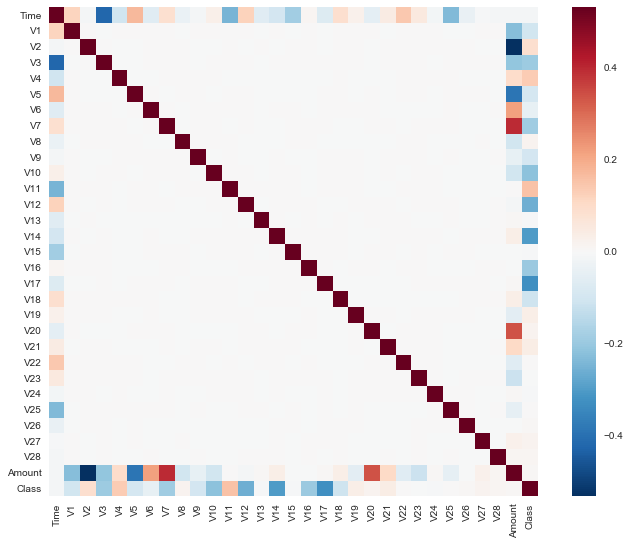

In [10]:
corrmat = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.5,square=True)
plt.show()

# Separate X and Y value

In [13]:
x = data.drop(['Class'],axis=1).values
y = data["Class"].values
print(x.shape)
print(y.shape)
#get the values i.e, numpy array with no columns


(284807, 30)
(284807,)


# Split the data into training and testing set

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

# Random forest classification model

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

# Evaluation

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
print("Accuracy score : ",acc)
print("Confusion Matrix : \n",conf)

Accuracy score :  0.999543555353
Confusion Matrix : 
 [[56861     3]
 [   23    75]]
